# Нейроэволюция
Зачастую неизвестно, какой архитектурой нейронных сетей нужно пользоваться для решения поставленной задачи. Один из подходов к борьбе с такой проблемой - это **нейроэволюция** - *способ автоматически подобрать нейронную сеть, наиболее эффективную для решения данной задачи*.

-----------------------------------------------------------
**Генетический алгоритм** - это симуляция, состоящая из компонент:
- *популяция объектов* (из этих объектов нужно выбрать что-то одно по окончании алгоритма). Например, популяция архитектур нейронных сетей  
- *геномы* - каждый объект имеет признаки, которые в совокупности составляют геном объекта (существуют разные способы задать геном, например битовые строки)
- *функция приспособления (fitness function)* - по ней будем отбирать объекты: они будут ранжироваться по значениям этой функции, далее будет происходить отсечение нерелевантных объектов  
- *мутации* - способности изменять значения признаков у объектов  
- *скрещивание* - комбинирование признаков разных объектов и получение нового объекта  
- *отбор* - возможность эволюции для наших объектов (на каждой фазе проходят дальше только часть объектов)
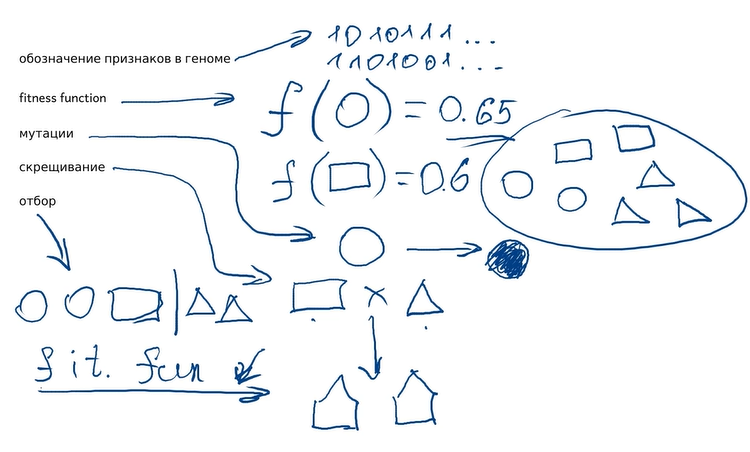

**Генетический алгоритм:**
1) создание популяции  
2) цикл:
- мутирование существующих особей  
- оценка приспособленности особей  
- отбор наиболее приспособленных  
- скрещивание самых приспособленных  
3) представление результата (по исчерпании итераций цикла или достижении оптимальности решения)

---------------------------------------------------------------------------
Рассмотрим применение **нейроэволюции** (оптимизация поиска архитектуры нейронных сетей и нужных значений весов) - NEAT (нейроэволюция через аугментированные топологии).  
Ключевые понятия:
 - *кодирование признаков нейронной сети (каждый параметр каждой архитектуры)  
 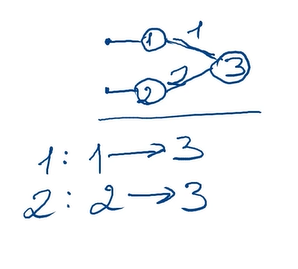  
 - *мутирование*: изменение какого-то веса у некоторой сети (зануление/изменение/прибавление новых нейронов)  
 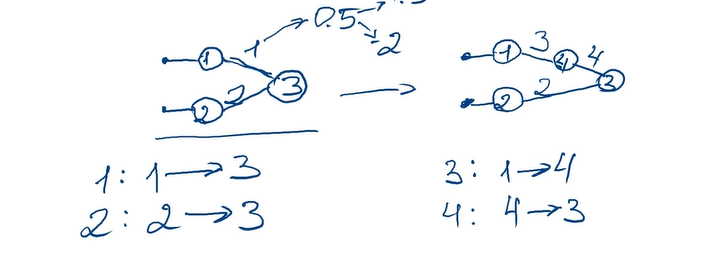  
 - *скрещивание*: осуществляется с использование закодированных геномов и позволяет комбинировать разные архитектуры
 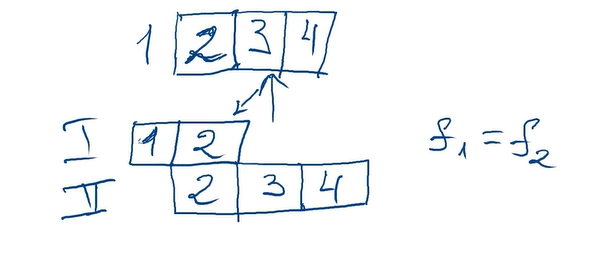  

Обычно на вход алгоритму попадают простейшие архитектуры. Далее происходят мутации, потом оценка с помощью fitness function, потом отбор и переход на новую фазу.

! В NEAT есть особенность: происходит оценка *похожести* топологий. Происходит обор архитектур внутри суб-популяций (то есть в рамках похожих сетей). Эта спецификация в NEAT позволяет сохранять сложность и накапливать её. Таким образом, происходит отбор сетей как простых, так и усложненных. Несмотря на преимущества, стоит сказать, что NEAT - это в некотором смысле эвристический подход, т.к. fitness function задается пользователем в зависимости от задачи и метрик качества

# Трюки в Pandas
Рассмотрим следующие топики:
- применение функций к DataFrame
- работа с Time Series
- работа с текстовыми данными

In [9]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv('data/movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Отберем пару колонок для простоты

In [3]:
genres = movie[['movie_title', 'genres']]
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


**Задача**: применить функцию к каждой из ячеек нашего DataFrame

In [4]:
# итерация по DataFrame - неэффективно
for row in genres.values[:3]:
    print('\n ----')
    for col in row:
        print(col, end=' # ')


 ----
Avatar  # Action|Adventure|Fantasy|Sci-Fi # 
 ----
Pirates of the Caribbean: At World's End  # Action|Adventure|Fantasy # 
 ----
Spectre  # Action|Adventure|Thriller # 

In [12]:
# итерация с использованием методов pandas
for  i, row in genres.iterrows():
    print(row) # строка DataFrame в виде Series
    print(row.map(lambda s: len(s)))
    print()

movie_title                            Avatar 
genres         Action|Adventure|Fantasy|Sci-Fi
Name: 0, dtype: object
movie_title     7
genres         31
Name: 0, dtype: int64

movie_title    Pirates of the Caribbean: At World's End 
genres                          Action|Adventure|Fantasy
Name: 1, dtype: object
movie_title    41
genres         24
Name: 1, dtype: int64

movie_title                     Spectre 
genres         Action|Adventure|Thriller
Name: 2, dtype: object
movie_title     8
genres         25
Name: 2, dtype: int64

movie_title    The Dark Knight Rises 
genres                Action|Thriller
Name: 3, dtype: object
movie_title    22
genres         15
Name: 3, dtype: int64

movie_title    Star Wars: Episode VII - The Force Awakens    ...
genres                                               Documentary
Name: 4, dtype: object
movie_title    55
genres         11
Name: 4, dtype: int64

movie_title               John Carter 
genres         Action|Adventure|Sci-Fi
Name: 5, dtype: 

Name: 152, dtype: int64

movie_title                              Beowulf 
genres         Action|Adventure|Animation|Fantasy
Name: 153, dtype: object
movie_title     8
genres         34
Name: 153, dtype: int64

movie_title                            Kung Fu Panda 3 
genres         Action|Adventure|Animation|Comedy|Family
Name: 154, dtype: object
movie_title    16
genres         40
Name: 154, dtype: int64

movie_title    Mission: Impossible - Ghost Protocol 
genres                     Action|Adventure|Thriller
Name: 155, dtype: object
movie_title    37
genres         25
Name: 155, dtype: int64

movie_title                Rise of the Guardians 
genres         Adventure|Animation|Family|Fantasy
Name: 156, dtype: object
movie_title    22
genres         34
Name: 156, dtype: int64

movie_title    Fun with Dick and Jane 
genres                    Comedy|Crime
Name: 157, dtype: object
movie_title    23
genres         12
Name: 157, dtype: int64

movie_title           The Last Samurai 
genres   

Name: 295, dtype: object
movie_title     7
genres         29
Name: 295, dtype: int64

movie_title    Django Unchained 
genres             Drama|Western
Name: 296, dtype: object
movie_title    17
genres         13
Name: 296, dtype: int64

movie_title              The Hunchback of Notre Dame 
genres         Animation|Drama|Family|Musical|Romance
Name: 297, dtype: object
movie_title    28
genres         38
Name: 297, dtype: int64

movie_title                    The Emperor's New Groove 
genres         Adventure|Animation|Comedy|Family|Fantasy
Name: 298, dtype: object
movie_title    25
genres         41
Name: 298, dtype: int64

movie_title           The Expendables 2 
genres         Action|Adventure|Thriller
Name: 299, dtype: object
movie_title    18
genres         25
Name: 299, dtype: int64

movie_title                        National Treasure 
genres         Action|Adventure|Comedy|Family|Mystery
Name: 300, dtype: object
movie_title    18
genres         38
Name: 300, dtype: int64

movie_

Name: 459, dtype: object
movie_title    22
genres         44
Name: 459, dtype: int64

movie_title                 Con Air 
genres         Action|Crime|Thriller
Name: 460, dtype: object
movie_title     8
genres         21
Name: 460, dtype: int64

movie_title                 Eagle Eye 
genres         Action|Mystery|Thriller
Name: 461, dtype: object
movie_title    10
genres         23
Name: 461, dtype: int64

movie_title                         Cold Mountain 
genres         Adventure|Drama|History|Romance|War
Name: 462, dtype: object
movie_title    14
genres         35
Name: 462, dtype: int64

movie_title                   The Book of Eli 
genres         Action|Adventure|Drama|Thriller
Name: 463, dtype: object
movie_title    16
genres         31
Name: 463, dtype: int64

movie_title                Flubber 
genres         Comedy|Family|Sci-Fi
Name: 464, dtype: object
movie_title     8
genres         20
Name: 464, dtype: int64

movie_title                      The Haunting 
genres         Fa

Name: 615, dtype: int64

movie_title    Underworld: Awakening 
genres          Action|Fantasy|Horror
Name: 616, dtype: object
movie_title    22
genres         21
Name: 616, dtype: int64

movie_title                   Rock of Ages 
genres         Comedy|Drama|Musical|Romance
Name: 617, dtype: object
movie_title    13
genres         28
Name: 617, dtype: int64

movie_title    Hart's War 
genres           Drama|War
Name: 618, dtype: object
movie_title    11
genres          9
Name: 618, dtype: int64

movie_title            Killer Elite 
genres         Action|Crime|Thriller
Name: 619, dtype: object
movie_title    13
genres         21
Name: 619, dtype: int64

movie_title            Rollerball 
genres         Action|Sci-Fi|Sport
Name: 620, dtype: object
movie_title    11
genres         19
Name: 620, dtype: int64

movie_title      Ballistic: Ecks vs. Sever 
genres         Action|Crime|Sci-Fi|Thriller
Name: 621, dtype: object
movie_title    26
genres         28
Name: 621, dtype: int64

movie_tit

Name: 738, dtype: int64

movie_title                    Jack Reacher 
genres         Action|Crime|Mystery|Thriller
Name: 739, dtype: object
movie_title    13
genres         29
Name: 739, dtype: int64

movie_title            Deep Blue Sea 
genres         Action|Sci-Fi|Thriller
Name: 740, dtype: object
movie_title    14
genres         22
Name: 740, dtype: int64

movie_title          This Is It 
genres         Documentary|Music
Name: 741, dtype: object
movie_title    11
genres         17
Name: 741, dtype: int64

movie_title        Contagion 
genres         Drama|Thriller
Name: 742, dtype: object
movie_title    10
genres         14
Name: 742, dtype: int64

movie_title                   Kangaroo Jack 
genres         Action|Adventure|Comedy|Crime
Name: 743, dtype: object
movie_title    14
genres         29
Name: 743, dtype: int64

movie_title                   Coraline 
genres         Animation|Family|Fantasy
Name: 744, dtype: object
movie_title     9
genres         24
Name: 744, dtype: int6

Name: 885, dtype: int64

movie_title                     Muppets Most Wanted 
genres         Adventure|Comedy|Crime|Family|Musical
Name: 886, dtype: object
movie_title    20
genres         37
Name: 886, dtype: int64

movie_title                            Thunderbirds 
genres         Action|Adventure|Comedy|Family|Sci-Fi
Name: 887, dtype: object
movie_title    13
genres         37
Name: 887, dtype: int64

movie_title                     Burlesque 
genres         Drama|Music|Musical|Romance
Name: 888, dtype: object
movie_title    10
genres         27
Name: 888, dtype: int64

movie_title      A Very Long Engagement 
genres         Drama|Mystery|Romance|War
Name: 889, dtype: object
movie_title    23
genres         25
Name: 889, dtype: int64

movie_title                Lolita 
genres         Crime|Drama|Romance
Name: 890, dtype: object
movie_title     7
genres         19
Name: 890, dtype: int64

movie_title                     Eye See You 
genres         Crime|Horror|Mystery|Thriller
Name:

Name: 1041, dtype: int64

movie_title             The Bone Collector 
genres         Crime|Drama|Mystery|Thriller
Name: 1042, dtype: object
movie_title    19
genres         28
Name: 1042, dtype: int64

movie_title             Panic Room 
genres         Crime|Drama|Thriller
Name: 1043, dtype: object
movie_title    11
genres         20
Name: 1043, dtype: int64

movie_title    The Tooth Fairy 
genres          Horror|Thriller
Name: 1044, dtype: object
movie_title    16
genres         15
Name: 1044, dtype: int64

movie_title                         Three Kings 
genres         Action|Adventure|Comedy|Drama|War
Name: 1045, dtype: object
movie_title    12
genres         33
Name: 1045, dtype: int64

movie_title               Child 44 
genres         Crime|Drama|Thriller
Name: 1046, dtype: object
movie_title     9
genres         20
Name: 1046, dtype: int64

movie_title           Rat Race 
genres         Adventure|Comedy
Name: 1047, dtype: object
movie_title     9
genres         16
Name: 1047, dt

Name: 1190, dtype: object
movie_title    21
genres         13
Name: 1190, dtype: int64

movie_title                 Spy Kids 3-D: Game Over 
genres         Action|Adventure|Comedy|Family|Sci-Fi
Name: 1191, dtype: object
movie_title    24
genres         37
Name: 1191, dtype: int64

movie_title         A Time to Kill 
genres         Crime|Drama|Thriller
Name: 1192, dtype: object
movie_title    15
genres         20
Name: 1192, dtype: int64

movie_title    Cheaper by the Dozen 
genres                 Comedy|Family
Name: 1193, dtype: object
movie_title    21
genres         13
Name: 1193, dtype: int64

movie_title                         Lone Survivor 
genres         Action|Biography|Drama|Thriller|War
Name: 1194, dtype: object
movie_title    14
genres         35
Name: 1194, dtype: int64

movie_title    A League of Their Own 
genres             Comedy|Drama|Sport
Name: 1195, dtype: object
movie_title    22
genres         18
Name: 1195, dtype: int64

movie_title           The Conjuring 2 
gen

Name: 1329, dtype: int64

movie_title       The Time Traveler's Wife 
genres         Drama|Fantasy|Romance|Sci-Fi
Name: 1330, dtype: object
movie_title    25
genres         28
Name: 1330, dtype: int64

movie_title    Because I Said So 
genres             Comedy|Romance
Name: 1331, dtype: object
movie_title    18
genres         14
Name: 1331, dtype: int64

movie_title    The Fast and the Furious 
genres             Action|Crime|Thriller
Name: 1332, dtype: object
movie_title    25
genres         21
Name: 1332, dtype: int64

movie_title                           Frankenweenie 
genres         Animation|Comedy|Family|Horror|Sci-Fi
Name: 1333, dtype: object
movie_title    14
genres         37
Name: 1333, dtype: int64

movie_title                           Serenity 
genres         Action|Adventure|Sci-Fi|Thriller
Name: 1334, dtype: object
movie_title     9
genres         32
Name: 1334, dtype: int64

movie_title               Against the Ropes 
genres         Biography|Drama|Romance|Sport
Name

Name: 1472, dtype: int64

movie_title            Broken City 
genres         Crime|Drama|Thriller
Name: 1473, dtype: object
movie_title    12
genres         20
Name: 1473, dtype: int64

movie_title          Cursed 
genres         Comedy|Horror
Name: 1474, dtype: object
movie_title     7
genres         13
Name: 1474, dtype: int64

movie_title            Premium Rush 
genres         Action|Crime|Thriller
Name: 1475, dtype: object
movie_title    13
genres         21
Name: 1475, dtype: int64

movie_title           Hot Pursuit 
genres         Action|Comedy|Crime
Name: 1476, dtype: object
movie_title    12
genres         19
Name: 1476, dtype: int64

movie_title             The Four Feathers 
genres         Adventure|Drama|Romance|War
Name: 1477, dtype: object
movie_title    18
genres         27
Name: 1477, dtype: int64

movie_title                          Parker 
genres         Action|Crime|Romance|Thriller
Name: 1478, dtype: object
movie_title     7
genres         29
Name: 1478, dtype: int

Name: 1612, dtype: int64

movie_title    About Schmidt 
genres           Comedy|Drama
Name: 1613, dtype: object
movie_title    14
genres         12
Name: 1613, dtype: int64

movie_title             Warm Bodies 
genres         Comedy|Horror|Romance
Name: 1614, dtype: object
movie_title    12
genres         21
Name: 1614, dtype: int64

movie_title                               Looper 
genres         Action|Crime|Drama|Sci-Fi|Thriller
Name: 1615, dtype: object
movie_title     7
genres         34
Name: 1615, dtype: int64

movie_title    Down to Earth 
genres         Comedy|Fantasy
Name: 1616, dtype: object
movie_title    14
genres         14
Name: 1616, dtype: int64

movie_title                  Babe 
genres         Comedy|Drama|Family
Name: 1617, dtype: object
movie_title     5
genres         19
Name: 1617, dtype: int64

movie_title           Hope Springs 
genres         Comedy|Drama|Romance
Name: 1618, dtype: object
movie_title    13
genres         20
Name: 1618, dtype: int64

movie_titl

Name: 1747, dtype: int64

movie_title                Straight Outta Compton 
genres         Biography|Crime|Drama|History|Music
Name: 1748, dtype: object
movie_title    23
genres         35
Name: 1748, dtype: int64

movie_title    Indiana Jones and the Temple of Doom 
genres                              Action|Adventure
Name: 1749, dtype: object
movie_title    37
genres         16
Name: 1749, dtype: int64

movie_title                                 The Rugrats Movie 
genres         Adventure|Animation|Comedy|Drama|Family|Musical
Name: 1750, dtype: object
movie_title    18
genres         47
Name: 1750, dtype: int64

movie_title    Along Came a Spider 
genres         Crime|Drama|Thriller
Name: 1751, dtype: object
movie_title    20
genres         20
Name: 1751, dtype: int64

movie_title                Florence Foster Jenkins 
genres         Biography|Comedy|Drama|Music|Romance
Name: 1752, dtype: object
movie_title    24
genres         36
Name: 1752, dtype: int64

movie_title    Once Upon

Name: 1918, dtype: int64

movie_title      Million Dollar Arm 
genres         Biography|Drama|Sport
Name: 1919, dtype: object
movie_title    19
genres         21
Name: 1919, dtype: int64

movie_title              The Giver 
genres         Drama|Romance|Sci-Fi
Name: 1920, dtype: object
movie_title    10
genres         20
Name: 1920, dtype: int64

movie_title             What a Girl Wants 
genres         Comedy|Drama|Family|Romance
Name: 1921, dtype: object
movie_title    18
genres         27
Name: 1921, dtype: int64

movie_title    Jeepers Creepers II 
genres                       Horror
Name: 1922, dtype: object
movie_title    20
genres          6
Name: 1922, dtype: int64

movie_title    Good Luck Chuck 
genres           Comedy|Romance
Name: 1923, dtype: object
movie_title    16
genres         14
Name: 1923, dtype: int64

movie_title            Cradle 2 the Grave 
genres         Action|Crime|Drama|Thriller
Name: 1924, dtype: object
movie_title    19
genres         27
Name: 1924, dtype:

Name: 2079, dtype: object
movie_title    11
genres         23
Name: 2079, dtype: int64

movie_title    The Water Diviner 
genres                  Drama|War
Name: 2080, dtype: object
movie_title    18
genres          9
Name: 2080, dtype: int64

movie_title                            Ghost 
genres         Drama|Fantasy|Romance|Thriller
Name: 2081, dtype: object
movie_title     6
genres         30
Name: 2081, dtype: int64

movie_title    There's Something About Mary 
genres                        Comedy|Romance
Name: 2082, dtype: object
movie_title    29
genres         14
Name: 2082, dtype: int64

movie_title              The Santa Clause 
genres         Comedy|Drama|Family|Fantasy
Name: 2083, dtype: object
movie_title    17
genres         27
Name: 2083, dtype: int64

movie_title           The Rookie 
genres         Drama|Family|Sport
Name: 2084, dtype: object
movie_title    11
genres         18
Name: 2084, dtype: int64

movie_title         The Game Plan 
genres         Comedy|Family|Spor

Name: 2225, dtype: int64

movie_title        The World's End 
genres         Action|Comedy|Sci-Fi
Name: 2226, dtype: object
movie_title    16
genres         20
Name: 2226, dtype: int64

movie_title                                     Nancy Drew 
genres         Comedy|Crime|Family|Mystery|Romance|Thriller
Name: 2227, dtype: object
movie_title    11
genres         44
Name: 2227, dtype: int64

movie_title                     Daybreakers 
genres         Action|Horror|Sci-Fi|Thriller
Name: 2228, dtype: object
movie_title    12
genres         29
Name: 2228, dtype: int64

movie_title    She's Out of My League 
genres                  Comedy|Romance
Name: 2229, dtype: object
movie_title    23
genres         14
Name: 2229, dtype: int64

movie_title                       Monte Carlo 
genres         Adventure|Comedy|Family|Romance
Name: 2230, dtype: object
movie_title    12
genres         31
Name: 2230, dtype: int64

movie_title        Stay Alive 
genres         Horror|Thriller
Name: 2231, dtype:

Name: 2376, dtype: int64

movie_title                  Sex Drive 
genres         Adventure|Comedy|Romance
Name: 2377, dtype: object
movie_title    10
genres         24
Name: 2377, dtype: int64

movie_title        Leap Year 
genres         Comedy|Romance
Name: 2378, dtype: object
movie_title    10
genres         14
Name: 2378, dtype: int64

movie_title    The Fall of the Roman Empire 
genres                     Drama|History|War
Name: 2379, dtype: object
movie_title    29
genres         17
Name: 2379, dtype: int64

movie_title    Take Me Home Tonight 
genres          Comedy|Drama|Romance
Name: 2380, dtype: object
movie_title    21
genres         20
Name: 2380, dtype: int64

movie_title    Won't Back Down 
genres                    Drama
Name: 2381, dtype: object
movie_title    16
genres          5
Name: 2381, dtype: int64

movie_title         The Nutcracker 
genres         Family|Fantasy|Music
Name: 2382, dtype: object
movie_title    15
genres         20
Name: 2382, dtype: int64

movie_

Name: 2500, dtype: object
movie_title    23
genres         20
Name: 2500, dtype: int64

movie_title                 Beastly 
genres         Drama|Fantasy|Romance
Name: 2501, dtype: object
movie_title     8
genres         21
Name: 2501, dtype: int64

movie_title    The Hills Have Eyes 
genres                       Horror
Name: 2502, dtype: object
movie_title    20
genres          6
Name: 2502, dtype: int64

movie_title    Dickie Roberts: Former Child Star 
genres                                     Comedy
Name: 2503, dtype: object
movie_title    34
genres          6
Name: 2503, dtype: int64

movie_title          McFarland, USA 
genres         Biography|Drama|Sport
Name: 2504, dtype: object
movie_title    15
genres         21
Name: 2504, dtype: int64

movie_title    Lottery Ticket 
genres                  Comedy
Name: 2505, dtype: object
movie_title    15
genres          6
Name: 2505, dtype: int64

movie_title                                ATL 
genres         Comedy|Crime|Drama|Music|Ro

Name: 2672, dtype: int64

movie_title              The Marine 
genres         Action|Drama|Thriller
Name: 2673, dtype: object
movie_title    11
genres         21
Name: 2673, dtype: int64

movie_title           Keanu 
genres         Action|Comedy
Name: 2674, dtype: object
movie_title     6
genres         13
Name: 2674, dtype: int64

movie_title    Country Strong 
genres             Drama|Music
Name: 2675, dtype: object
movie_title    15
genres         11
Name: 2675, dtype: int64

movie_title              Disturbing Behavior 
genres         Horror|Mystery|Sci-Fi|Thriller
Name: 2676, dtype: object
movie_title    20
genres         30
Name: 2676, dtype: int64

movie_title    The Place Beyond the Pines 
genres                Crime|Drama|Thriller
Name: 2677, dtype: object
movie_title    27
genres         20
Name: 2677, dtype: int64

movie_title        The November Man 
genres         Action|Crime|Thriller
Name: 2678, dtype: object
movie_title    17
genres         21
Name: 2678, dtype: int64



Name: 2818, dtype: object
movie_title     8
genres         20
Name: 2818, dtype: int64

movie_title    Brokeback Mountain 
genres               Drama|Romance
Name: 2819, dtype: object
movie_title    19
genres         13
Name: 2819, dtype: int64

movie_title     Teenage Mutant Ninja Turtles 
genres         Action|Adventure|Comedy|Sci-Fi
Name: 2820, dtype: object
movie_title    29
genres         30
Name: 2820, dtype: int64

movie_title         Clueless 
genres         Comedy|Romance
Name: 2821, dtype: object
movie_title     9
genres         14
Name: 2821, dtype: int64

movie_title    Far from Heaven 
genres            Drama|Romance
Name: 2822, dtype: object
movie_title    16
genres         13
Name: 2822, dtype: int64

movie_title    Hot Tub Time Machine 2 
genres                   Comedy|Sci-Fi
Name: 2823, dtype: object
movie_title    23
genres         13
Name: 2823, dtype: int64

movie_title    Dekalog             
genres                        Drama
Name: 2824, dtype: object
movie_titl

Name: 2953, dtype: int64

movie_title    The Upside of Anger 
genres                 Comedy|Drama
Name: 2954, dtype: object
movie_title    20
genres         12
Name: 2954, dtype: int64

movie_title    The Boys from Brazil 
genres                Drama|Thriller
Name: 2955, dtype: object
movie_title    21
genres         14
Name: 2955, dtype: int64

movie_title                      Aquamarine 
genres         Comedy|Family|Fantasy|Romance
Name: 2956, dtype: object
movie_title    11
genres         29
Name: 2956, dtype: int64

movie_title             Paper Towns 
genres         Drama|Mystery|Romance
Name: 2957, dtype: object
movie_title    12
genres         21
Name: 2957, dtype: int64

movie_title    My Baby's Daddy 
genres                   Comedy
Name: 2958, dtype: object
movie_title    16
genres          6
Name: 2958, dtype: int64

movie_title                 Nebraska 
genres         Adventure|Comedy|Drama
Name: 2959, dtype: object
movie_title     9
genres         22
Name: 2959, dtype: int

Name: 3104, dtype: int64

movie_title    Jeepers Creepers 
genres            Horror|Mystery
Name: 3105, dtype: object
movie_title    17
genres         14
Name: 3105, dtype: int64

movie_title    Bill & Ted's Excellent Adventure 
genres             Adventure|Comedy|Music|Sci-Fi
Name: 3106, dtype: object
movie_title    33
genres         29
Name: 3106, dtype: int64

movie_title                Oliver! 
genres         Drama|Family|Musical
Name: 3107, dtype: object
movie_title     8
genres         20
Name: 3107, dtype: int64

movie_title    The Best Exotic Marigold Hotel 
genres                            Comedy|Drama
Name: 3108, dtype: object
movie_title    31
genres         12
Name: 3108, dtype: int64

movie_title                     Recess: School's Out 
genres         Animation|Comedy|Family|Mystery|Sci-Fi
Name: 3109, dtype: object
movie_title    21
genres         38
Name: 3109, dtype: int64

movie_title         Mad Max Beyond Thunderdome 
genres         Action|Adventure|Sci-Fi|Thriller



movie_title    Blood Done Sign My Name 
genres                            Drama
Name: 3231, dtype: object
movie_title    24
genres          5
Name: 3231, dtype: int64

movie_title    Cinco de Mayo, La Batalla 
genres                  Drama|History|War
Name: 3232, dtype: object
movie_title    26
genres         17
Name: 3232, dtype: int64

movie_title            Elsa & Fred 
genres         Comedy|Drama|Romance
Name: 3233, dtype: object
movie_title    12
genres         20
Name: 3233, dtype: int64

movie_title    An Alan Smithee Film: Burn Hollywood Burn 
genres                                             Comedy
Name: 3234, dtype: object
movie_title    42
genres          6
Name: 3234, dtype: int64

movie_title    The Open Road 
genres           Comedy|Drama
Name: 3235, dtype: object
movie_title    14
genres         12
Name: 3235, dtype: int64

movie_title     The Good Guy 
genres         Comedy|Romance
Name: 3236, dtype: object
movie_title    13
genres         14
Name: 3236, dtype: int64


Name: 3360, dtype: object
movie_title     7
genres         22
Name: 3360, dtype: int64

movie_title    Little Miss Sunshine 
genres                  Comedy|Drama
Name: 3361, dtype: object
movie_title    21
genres         12
Name: 3361, dtype: int64

movie_title       Stand by Me 
genres         Adventure|Drama
Name: 3362, dtype: object
movie_title    12
genres         15
Name: 3362, dtype: int64

movie_title               28 Days Later... 
genres         Drama|Horror|Sci-Fi|Thriller
Name: 3363, dtype: object
movie_title    17
genres         28
Name: 3363, dtype: int64

movie_title    You Got Served 
genres             Drama|Music
Name: 3364, dtype: object
movie_title    15
genres         11
Name: 3364, dtype: int64

movie_title    Escape from Alcatraz 
genres         Biography|Crime|Drama
Name: 3365, dtype: object
movie_title    21
genres         21
Name: 3365, dtype: int64

movie_title                  Brown Sugar 
genres         Comedy|Drama|Music|Romance
Name: 3366, dtype: object
mo

Name: 3530, dtype: int64

movie_title    The Extra Man 
genres                 Comedy
Name: 3531, dtype: object
movie_title    14
genres          6
Name: 3531, dtype: int64

movie_title    Hard to Be a God 
genres              Drama|Sci-Fi
Name: 3532, dtype: object
movie_title    17
genres         12
Name: 3532, dtype: int64

movie_title                    Ca$h 
genres         Comedy|Crime|Thriller
Name: 3533, dtype: object
movie_title     5
genres         21
Name: 3533, dtype: int64

movie_title    Wah-Wah 
genres            Drama
Name: 3534, dtype: object
movie_title    8
genres         5
Name: 3534, dtype: int64

movie_title     The Boondock Saints 
genres         Action|Crime|Thriller
Name: 3535, dtype: object
movie_title    20
genres         21
Name: 3535, dtype: int64

movie_title        Z Storm 
genres         Action|Crime
Name: 3536, dtype: object
movie_title     8
genres         12
Name: 3536, dtype: int64

movie_title                           Twixt 
genres         Comedy|Fan

Name: 3665, dtype: object
movie_title    12
genres         13
Name: 3665, dtype: int64

movie_title    [Rec] 2 
genres           Horror
Name: 3666, dtype: object
movie_title    8
genres         6
Name: 3666, dtype: int64

movie_title    Standing Ovation 
genres                   Musical
Name: 3667, dtype: object
movie_title    17
genres          7
Name: 3667, dtype: int64

movie_title            The Sting 
genres         Comedy|Crime|Drama
Name: 3668, dtype: object
movie_title    10
genres         18
Name: 3668, dtype: int64

movie_title        Chariots of Fire 
genres         Biography|Drama|Sport
Name: 3669, dtype: object
movie_title    17
genres         21
Name: 3669, dtype: int64

movie_title    Diary of a Mad Black Woman 
genres                Comedy|Drama|Romance
Name: 3670, dtype: object
movie_title    27
genres         20
Name: 3670, dtype: int64

movie_title                           Shine 
genres         Biography|Drama|Music|Romance
Name: 3671, dtype: object
movie_title     

Name: 3796, dtype: int64

movie_title         The Visit 
genres         Horror|Thriller
Name: 3797, dtype: object
movie_title    10
genres         15
Name: 3797, dtype: int64

movie_title             Redacted 
genres         Crime|Thriller|War
Name: 3798, dtype: object
movie_title     9
genres         18
Name: 3798, dtype: int64

movie_title                Fascination 
genres         Mystery|Romance|Thriller
Name: 3799, dtype: object
movie_title    12
genres         24
Name: 3799, dtype: int64

movie_title    Saving Grace             
genres                     Drama|Fantasy
Name: 3800, dtype: object
movie_title    25
genres         13
Name: 3800, dtype: int64

movie_title                  Area 51 
genres         Horror|Sci-Fi|Thriller
Name: 3801, dtype: object
movie_title     8
genres         22
Name: 3801, dtype: int64

movie_title             Sleep Tight 
genres         Drama|Horror|Thriller
Name: 3802, dtype: object
movie_title    12
genres         21
Name: 3802, dtype: int64

movi

Name: 3932, dtype: int64

movie_title    The Art of Getting By 
genres                  Drama|Romance
Name: 3933, dtype: object
movie_title    22
genres         13
Name: 3933, dtype: int64

movie_title           Zipper 
genres         Drama|Thriller
Name: 3934, dtype: object
movie_title     7
genres         14
Name: 3934, dtype: int64

movie_title    Poolhall Junkies 
genres            Drama|Thriller
Name: 3935, dtype: object
movie_title    17
genres         14
Name: 3935, dtype: int64

movie_title    The Loss of Sexual Innocence 
genres                                 Drama
Name: 3936, dtype: object
movie_title    29
genres          5
Name: 3936, dtype: int64

movie_title     Holy Motors 
genres         Drama|Fantasy
Name: 3937, dtype: object
movie_title    12
genres         13
Name: 3937, dtype: int64

movie_title     Joe 
genres         Drama
Name: 3938, dtype: object
movie_title    4
genres         5
Name: 3938, dtype: int64

movie_title          Shooting Fish 
genres         Comed

Name: 4066, dtype: int64

movie_title           Spaced Invaders 
genres         Adventure|Comedy|Sci-Fi
Name: 4067, dtype: object
movie_title    16
genres         23
Name: 4067, dtype: int64

movie_title       Family Plot 
genres         Comedy|Thriller
Name: 4068, dtype: object
movie_title    12
genres         15
Name: 4068, dtype: int64

movie_title          The Apartment 
genres         Comedy|Drama|Romance
Name: 4069, dtype: object
movie_title    14
genres         20
Name: 4069, dtype: int64

movie_title    Jason Goes to Hell: The Final Friday 
genres                       Fantasy|Horror|Thriller
Name: 4070, dtype: object
movie_title    37
genres         23
Name: 4070, dtype: int64

movie_title    Torn Curtain 
genres              Thriller
Name: 4071, dtype: object
movie_title    13
genres          8
Name: 4071, dtype: int64

movie_title    Dave Chappelle's Block Party 
genres              Comedy|Documentary|Music
Name: 4072, dtype: object
movie_title    29
genres         24
Name: 

Name: 4212, dtype: int64

movie_title                           Thr3e 
genres         Drama|Horror|Mystery|Thriller
Name: 4213, dtype: object
movie_title     6
genres         29
Name: 4213, dtype: int64

movie_title                 Idiocracy 
genres         Adventure|Comedy|Sci-Fi
Name: 4214, dtype: object
movie_title    10
genres         23
Name: 4214, dtype: int64

movie_title    The Rise of the Krays 
genres                    Crime|Drama
Name: 4215, dtype: object
movie_title    22
genres         11
Name: 4215, dtype: int64

movie_title    This Is England 
genres              Crime|Drama
Name: 4216, dtype: object
movie_title    16
genres         11
Name: 4216, dtype: int64

movie_title    Alien Uprising 
genres           Comedy|Sci-Fi
Name: 4217, dtype: object
movie_title    15
genres         13
Name: 4217, dtype: int64

movie_title    Bathing Beauty 
genres          Comedy|Musical
Name: 4218, dtype: object
movie_title    15
genres         14
Name: 4218, dtype: int64

movie_title   

Name: 4350, dtype: object
movie_title     7
genres         20
Name: 4350, dtype: int64

movie_title    ABCD (Any Body Can Dance) 
genres                      Drama|Musical
Name: 4351, dtype: object
movie_title    26
genres         13
Name: 4351, dtype: int64

movie_title    A Nightmare on Elm Street 
genres                             Horror
Name: 4352, dtype: object
movie_title    26
genres          6
Name: 4352, dtype: int64

movie_title                                    Man on Wire 
genres         Biography|Crime|Documentary|History|Thriller
Name: 4353, dtype: object
movie_title    12
genres         44
Name: 4353, dtype: int64

movie_title    Abandoned 
genres              Drama
Name: 4354, dtype: object
movie_title    10
genres          5
Name: 4354, dtype: int64

movie_title    Brotherly Love 
genres                   Drama
Name: 4355, dtype: object
movie_title    15
genres          5
Name: 4355, dtype: int64

movie_title       The Last Exorcism 
genres         Drama|Horror|Thril

Name: 4488, dtype: int64

movie_title    The Day the Earth Stood Still 
genres                  Drama|Sci-Fi|Thriller
Name: 4489, dtype: object
movie_title    30
genres         21
Name: 4489, dtype: int64

movie_title        Monsoon Wedding 
genres         Comedy|Drama|Romance
Name: 4490, dtype: object
movie_title    16
genres         20
Name: 4490, dtype: int64

movie_title    You Can Count on Me 
genres                        Drama
Name: 4491, dtype: object
movie_title    20
genres          5
Name: 4491, dtype: int64

movie_title    The Trouble with Harry 
genres          Comedy|Mystery|Romance
Name: 4492, dtype: object
movie_title    23
genres         22
Name: 4492, dtype: int64

movie_title            Lucky Number Slevin 
genres         Crime|Drama|Mystery|Thriller
Name: 4493, dtype: object
movie_title    20
genres         28
Name: 4493, dtype: int64

movie_title    But I'm a Cheerleader 
genres                   Comedy|Drama
Name: 4494, dtype: object
movie_title    22
genres      

Name: 4633, dtype: object
movie_title    16
genres         15
Name: 4633, dtype: int64

movie_title    Jesse             
genres                     Comedy
Name: 4634, dtype: object
movie_title    18
genres          6
Name: 4634, dtype: int64

movie_title    Ask Me Anything 
genres                    Drama
Name: 4635, dtype: object
movie_title    16
genres          5
Name: 4635, dtype: int64

movie_title    And Then Came Love 
genres              Comedy|Romance
Name: 4636, dtype: object
movie_title    19
genres         14
Name: 4636, dtype: int64

movie_title        Food Chains 
genres         Documentary|News
Name: 4637, dtype: object
movie_title    12
genres         16
Name: 4637, dtype: int64

movie_title     On the Waterfront 
genres         Crime|Drama|Romance
Name: 4638, dtype: object
movie_title    18
genres         19
Name: 4638, dtype: int64

movie_title    L!fe Happens 
genres                Comedy
Name: 4639, dtype: object
movie_title    13
genres          6
Name: 4639, dtyp

Name: 4793, dtype: int64

movie_title    Dogtown and Z-Boys 
genres           Documentary|Sport
Name: 4794, dtype: object
movie_title    19
genres         17
Name: 4794, dtype: int64

movie_title    Monty Python and the Holy Grail 
genres                 Adventure|Comedy|Fantasy
Name: 4795, dtype: object
movie_title    32
genres         24
Name: 4795, dtype: int64

movie_title    Quinceañera 
genres                Drama
Name: 4796, dtype: object
movie_title    12
genres          5
Name: 4796, dtype: int64

movie_title            Gory Gory Hallelujah 
genres         Comedy|Fantasy|Horror|Musical
Name: 4797, dtype: object
movie_title    21
genres         29
Name: 4797, dtype: int64

movie_title              Heroes             
genres         Drama|Fantasy|Sci-Fi|Thriller
Name: 4798, dtype: object
movie_title    19
genres         29
Name: 4798, dtype: int64

movie_title               Tarnation 
genres         Biography|Documentary
Name: 4799, dtype: object
movie_title    10
genres        

Name: 4944, dtype: object
movie_title    18
genres         29
Name: 4944, dtype: int64

movie_title    The Brain That Sings 
genres            Documentary|Family
Name: 4945, dtype: object
movie_title    21
genres         18
Name: 4945, dtype: int64

movie_title    The Blood of My Brother 
genres                  Documentary|War
Name: 4946, dtype: object
movie_title    24
genres         15
Name: 4946, dtype: int64

movie_title    Your Sister's Sister 
genres                  Comedy|Drama
Name: 4947, dtype: object
movie_title    21
genres         12
Name: 4947, dtype: int64

movie_title    Romantic Schemer 
genres                   Romance
Name: 4948, dtype: object
movie_title    17
genres          7
Name: 4948, dtype: int64

movie_title    A Dog's Breakfast 
genres                     Comedy
Name: 4949, dtype: object
movie_title    18
genres          6
Name: 4949, dtype: int64

movie_title    A Dog's Breakfast 
genres                     Comedy
Name: 4950, dtype: object
movie_title    1

In [13]:
for  i, col in genres.iteritems():
    print(col) # строка DataFrame в виде Series
    print(col.map(lambda s: len(s)))
    print()

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object
0        7
1       41
2        8
3       22
4       55
        ..
5038    24
5039    26
5040    21
5041    17
5042    18
Name: movie_title, Length: 5043, dtype: int64

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Act

In [6]:
# альтернативный метод без итерации
budget = movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [7]:
# применение функции к каждой ячейке
budget.applymap(lambda elem: elem + 1).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [11]:
# применение агрегирующей (и не только) функции к столбцу/строке
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [12]:
# то же самое, только нельзя делать агрегирующие функции
budget.transform(lambda x: x + 1, axis=0)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


Для чего все это нужно? Во-первых, скорость:  
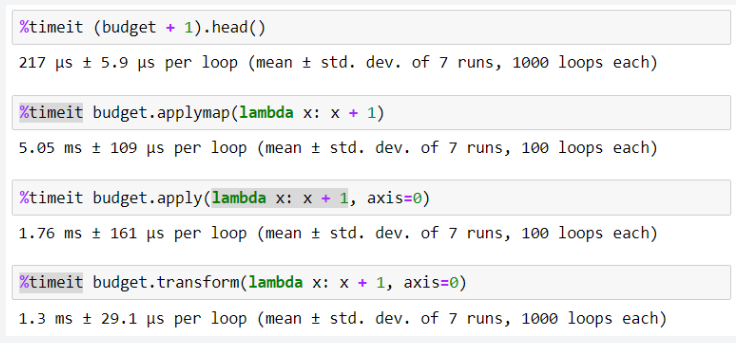  
Во-вторых, метод `apply` часто используется для применения сложных пользовательских функций

In [13]:
# ещё один метод (самый быстрый): достучаться до значений в DataFrame
budget.values # numpy array

array([[2.37e+08, 1.78e+02],
       [3.00e+08, 1.69e+02],
       [2.45e+08, 1.48e+02],
       ...,
       [1.40e+03, 7.60e+01],
       [     nan, 1.00e+02],
       [1.10e+03, 9.00e+01]])

In [14]:
np.mean(budget['budget'].dropna().values)

39752620.436387606

# Тестирование скорости

In [16]:
iris = pd.read_csv('data/iris.csv', index_col=0)
iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
%%timeit
iris.apply(np.mean)

385 µs ± 9.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit
iris.mean(axis=0)

235 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%%timeit
iris.describe().loc['mean']

5.59 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
iris.apply('mean')

259 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Time Series
Посмотрим на временные ряды. Каждому наблюдению может быть сопоставлено время (изготовления/сбора/...)

In [25]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv',
                    index_col=0, parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [26]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

*Время в качестве индекса* дает некоторые преимущества

In [30]:
# все данные за 2010
stock.loc['2010'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [32]:
# Все данные с февраля по сентябрь 2017 года
stock["2017-02":"2017-09"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-02-01,829.21,833.78,824.94,832.35,3850181
2017-02-02,836.59,842.49,828.26,839.95,7350492
2017-02-03,806.72,818.30,804.00,810.20,10868773
2017-02-06,809.80,810.72,803.00,807.64,3897301
2017-02-07,809.31,816.16,807.50,812.50,3466091
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,994.13,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [44]:
# уменьшить масштаб (количество записей) -> сагрегировать значения
#                                         по месяцу или по году или ...
stock.resample('1Y', ).mean() # среднее по году

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-31,138.971036,140.926853,137.019761,139.169602,7.288140e+06
2011-12-31,196.658413,199.444762,193.525516,196.663849,5.810698e+06
2012-12-31,220.011040,222.679440,217.588840,220.303680,4.200934e+06
2013-12-31,297.866270,300.925913,294.656587,298.032222,2.969756e+06
2014-12-31,332.799841,336.317460,328.545476,332.550913,4.088199e+06
2015-12-31,478.123532,483.248452,472.881905,478.138294,3.786690e+06
2016-12-31,699.756587,705.799127,692.646071,699.523135,4.103240e+06
2017-12-31,900.935259,906.482370,894.366593,901.238963,3.558034e+06


In [39]:
# увеличить масштаб (количество записей) -> разделить строки на несколько строк
#                                          с определенной периодичностью

stock.resample('4h').asfreq() # разделим на 6 временных точек каждый день

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 12:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 16:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 08:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 12:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 16:00:00,NaN,NaN,NaN,NaN,NaN


In [45]:
# применение оконных операций к Time Series
# поиск среднего в определенной части данных (которую можно выделить окном)
# *скользящим окном

stock.rolling(3).mean()
# рассчитать новое значение для каждой строки,
# используя 3 строки (текущую и 2 предшествующие)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [47]:
# если нужно уборать NaN в начале
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [48]:
# если размер окна нужно менять
stock.expanding().mean()
# для i-того наблюдения используется i строк

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [50]:
# можно задавать наименьший размер окна
stock.expanding(3).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [52]:
# экспоненциальное скользяцее окно (с дополнительными весами)
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


<AxesSubplot:xlabel='Date'>

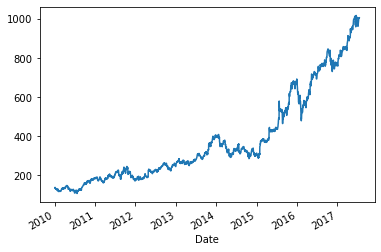

In [53]:
stock['Open'].plot()

<AxesSubplot:xlabel='Date'>

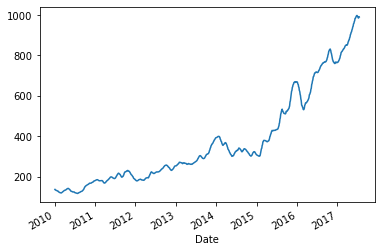

In [56]:
# как сгладить график? (сделать меньше угловатостей)
column = stock['Open'].rolling(20, min_periods=1).mean()
column.plot()

In [ ]:
# ещё одна особенность: легкое получение информации о конкретных датах

In [62]:
stock.index.weekday # порядковые номер дней
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64